In [71]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [72]:
conn = sqlite3.connect('palworld.db')
cursor = conn.cursor()


In [73]:
# Chargement des fichiers CSV dans des DataFrames
combat_attribute_df = pd.read_csv('Palworld_Data--Palu combat attribute table.csv', skiprows=1)
job_skill_df = pd.read_csv('Palworld_Data-Palu Job Skills Table.csv')
hidden_attribute_df = pd.read_csv('Palworld_Data-hide pallu attributes.csv')
refresh_area_df = pd.read_csv('Palworld_Data--Palu refresh level.csv')
ordinary_boss_attribute_df = pd.read_csv('Palworld_Data-comparison of ordinary BOSS attributes.csv')
tower_boss_attribute_df = pd.read_csv('Palworld_Data-Tower BOSS attribute comparison.csv')

# Renommer les colonnes pour les rendre exploitables
combat_attribute_df.columns = ['id', 'chinese_name', 'name', 'code_name', 'override_name_text_id', 'name_prefix_id', 'name_suffix_id', 
                               'full_name_text', 'species', 'type', 'element', 'gender', 'size', 'weight', 'catch_rate', 'hatch_time', 
                               'base_friendship', 'experience_growth', 'egg_group', 'ability_1', 'ability_2', 'hidden_ability', 
                               'base_hp', 'base_attack', 'base_defense', 'base_special_attack', 'base_special_defense', 
                               'base_speed', 'total_base_stats', 'non_bonus_panel_attack_power_range_reference', 
                               'dummy_1', 'dummy_2', 'dummy_3', 'dummy_4', 'dummy_5', 'dummy_6', 'dummy_7', 'dummy_8', 
                               'dummy_9', 'dummy_10', 'dummy_11', 'partner_skills', 'dummy_12', 'dummy_13', 'dummy_14', 'dummy_15', 
                               'dummy_16']

print("Renamed Combat Attribute Columns:")
print(combat_attribute_df.head())

# Pour les autres DataFrames, nous examinerons également leurs colonnes
print("Job Skill Columns:")
print(job_skill_df.columns)
print(job_skill_df.head(), '\n')

print("Hidden Attribute Columns:")
print(hidden_attribute_df.columns)
print(hidden_attribute_df.head(), '\n')

print("Refresh Area Columns:")
print(refresh_area_df.columns)
print(refresh_area_df.head(), '\n')

print("Ordinary Boss Attribute Columns:")
print(ordinary_boss_attribute_df.columns)
print(ordinary_boss_attribute_df.head(), '\n')

print("Tower Boss Attribute Columns:")
print(tower_boss_attribute_df.columns)
print(tower_boss_attribute_df.head(), '\n')


ValueError: Length mismatch: Expected axis has 50 elements, new values have 47 elements

In [ ]:
# Sauvegarde des données dans la base de données SQLite
combat_attribute_df.to_sql('combat_attribute', conn, if_exists='replace', index=False)
job_skill_df.to_sql('job_skill', conn, if_exists='replace', index=False)
hidden_attribute_df.to_sql('hidden_attribute', conn, if_exists='replace', index=False)
refresh_area_df.to_sql('refresh_area', conn, if_exists='replace', index=False)
ordinary_boss_attribute_df.to_sql('ordinary_boss_attribute', conn, if_exists='replace', index=False)
tower_boss_attribute_df.to_sql('tower_boss_attribute', conn, if_exists='replace', index=False)


16

In [ ]:
# Nettoyage des données pour chaque table

# Exemple de traitement des valeurs manquantes
combat_attribute_df.fillna(method='ffill', inplace=True)
job_skill_df.fillna(method='ffill', inplace=True)
hidden_attribute_df.fillna(method='ffill', inplace=True)
refresh_area_df.fillna(method='ffill', inplace=True)
ordinary_boss_attribute_df.fillna(method='ffill', inplace=True)
tower_boss_attribute_df.fillna(method='ffill', inplace=True)

# Vérifier les colonnes présentes dans combat_attribute_df
print("Colonnes dans combat_attribute_df avant suppression:")
print(combat_attribute_df.columns)

# Suppression des colonnes inutiles si elles existent
columns_to_drop = ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49']
combat_attribute_df.drop(columns=[col for col in columns_to_drop if col in combat_attribute_df.columns], inplace=True)

# Suppression des doublons
combat_attribute_df.drop_duplicates(inplace=True)
job_skill_df.drop_duplicates(inplace=True)
hidden_attribute_df.drop_duplicates(inplace=True)
refresh_area_df.drop_duplicates(inplace=True)
ordinary_boss_attribute_df.drop_duplicates(inplace=True)
tower_boss_attribute_df.drop_duplicates(inplace=True)

# Sauvegarde des tables nettoyées dans la base de données SQLite
combat_attribute_df.to_sql('combat_attribute_clean', conn, if_exists='replace', index=False)
job_skill_df.to_sql('job_skill_clean', conn, if_exists='replace', index=False)
hidden_attribute_df.to_sql('hidden_attribute_clean', conn, if_exists='replace', index=False)
refresh_area_df.to_sql('refresh_area_clean', conn, if_exists='replace', index=False)
ordinary_boss_attribute_df.to_sql('ordinary_boss_attribute_clean', conn, if_exists='replace', index=False)
tower_boss_attribute_df.to_sql('tower_boss_attribute_clean', conn, if_exists='replace', index=False)


Colonnes dans combat_attribute_df avant suppression:
Index(['ID', 'Chinese name', 'Name', 'CodeName', 'OverrideNameTextID',
       'NamePrefixID', 'OverridePartnerSkillTextID', 'IsPal', 'Tribe',
       'BPClass', 'variant', 'Volume size', 'rarity', 'Element 1', 'Element 2',
       'GenusCategory', 'Organization', 'weapon', 'WeaponEquip', 'nocturnal',
       '4D total', 'HP', 'melee attack', 'Remote attack', 'defense', 'support',
       'Speed of work', 'Level 1', 'Level 20', 'Level 50', 'AIRResponse',
       'AISightResponse', 'endurance', 'slow walking speed', 'walking speed',
       'running speed', 'Riding sprint speed', '(being) damage multiplier',
       'catch rate', 'Experience multiplier', 'price', 'Must bring entry 1',
       'Must bring entry 2', 'Numerical description', 'lv1', 'lv2', 'lv3',
       'lv4', 'lv5', 'Skill description'],
      dtype='object')


C:\Users\vicdu\AppData\Local\Temp\ipykernel_15036\2950478300.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combat_attribute_df.fillna(method='ffill', inplace=True)
C:\Users\vicdu\AppData\Local\Temp\ipykernel_15036\2950478300.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  job_skill_df.fillna(method='ffill', inplace=True)
C:\Users\vicdu\AppData\Local\Temp\ipykernel_15036\2950478300.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hidden_attribute_df.fillna(method='ffill', inplace=True)
C:\Users\vicdu\AppData\Local\Temp\ipykernel_15036\2950478300.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  refresh_area_df.

16

In [74]:
# Vérifier les colonnes disponibles dans la table nettoyée
query = "PRAGMA table_info(combat_attribute_clean)"
table_info = pd.read_sql(query, conn)
print(table_info)

# Utiliser une colonne existante pour l'analyse. Par exemple, nous utilisons 'weight' au lieu de 'size'
if 'weight' in table_info['name'].values:
    query = "SELECT weight FROM combat_attribute_clean"
    weight_data = pd.read_sql(query, conn)

    plt.figure(figsize=(10, 6))
    sns.histplot(weight_data['weight'], kde=True)
    plt.title('Distribution du poids des Pals')
    plt.xlabel('Poids')
    plt.ylabel('Fréquence')
    plt.show()
else:
    print("La colonne 'weight' n'existe pas dans la table 'combat_attribute_clean'.")


    cid                        name     type  notnull dflt_value  pk
0     0                          ID  INTEGER        0       None   0
1     1                Chinese name     TEXT        0       None   0
2     2                        Name     TEXT        0       None   0
3     3                    CodeName     TEXT        0       None   0
4     4          OverrideNameTextID     TEXT        0       None   0
5     5                NamePrefixID     REAL        0       None   0
6     6  OverridePartnerSkillTextID     TEXT        0       None   0
7     7                       IsPal  INTEGER        0       None   0
8     8                       Tribe     TEXT        0       None   0
9     9                     BPClass     TEXT        0       None   0
10   10                     variant     TEXT        0       None   0
11   11                 Volume size     TEXT        0       None   0
12   12                      rarity  INTEGER        0       None   0
13   13                   Element 

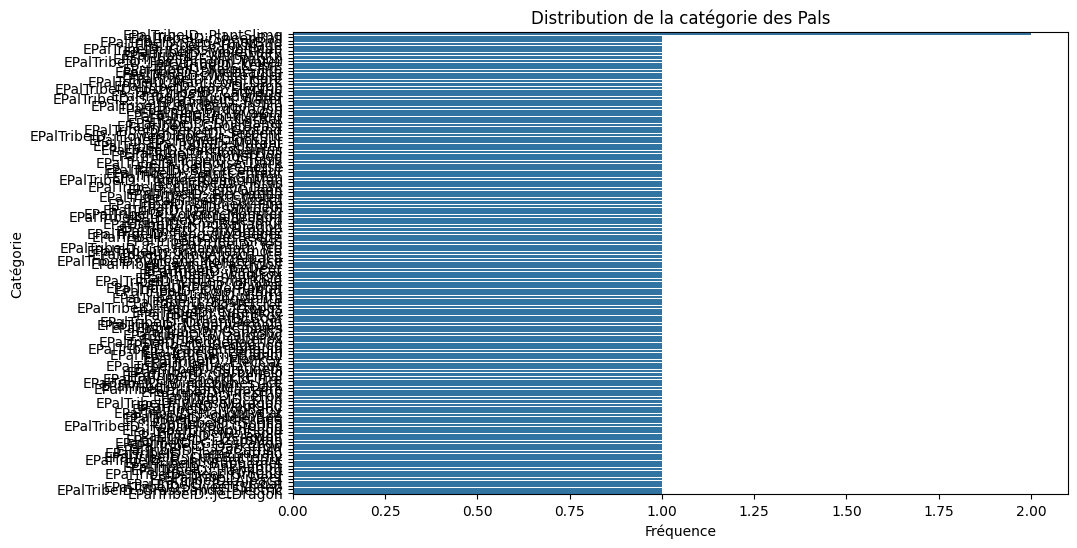

In [76]:
# Analyse exploratoire - Distribution de la catégorie des Pals
query = "SELECT Tribe FROM combat_attribute_clean"
tribe_data = pd.read_sql(query, conn)

# Limiter le nombre de catégories affichées pour améliorer la lisibilité
top_tribes = tribe_data['Tribe'].value_counts().nlargest(20).index
filtered_tribe_data = tribe_data[tribe_data['Tribe'].isin(top_tribes)]

plt.figure(figsize=(12, 8))
sns.countplot(y=filtered_tribe_data['Tribe'], order=filtered_tribe_data['Tribe'].value_counts().index)
plt.title('Distribution des 20 catégories les plus fréquentes des Pals')
plt.xlabel('Fréquence')
plt.ylabel('Catégorie')
plt.show()
